<a href="https://colab.research.google.com/github/itzrnvr/deeplearning-lab/blob/main/Assignment4_p1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 0: Install uv - the fast Python package installer
!curl -LsSf https://astral.sh/uv/install.sh | sh
# Add uv to the PATH for the current session
import os
os.environ["PATH"] = f"{os.environ['PATH']}:{os.path.expanduser('~/.cargo/bin')}" # Default uv install location
# Verify uv installation (optional)
!uv --version

# STEP 1: Install correct PyTorch version AND compatible NumPy using uv
print("Uninstalling existing torch, torchvision, torchaudio, numpy using uv...")
!uv pip uninstall -y torch torchvision torchaudio numpy

print("Installing PyTorch 2.1.0+cu118 and NumPy 1.26.4 using uv...")
!uv pip install --system torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0+cu118 --index-url https://download.pytorch.org/whl/cu118
!uv pip install --system numpy==1.26.4

print("="*80)
print("IMPORTANT: PyTorch 2.1.0+cu118 and NumPy 1.26.4 installation complete using uv.")
print("YOU MUST NOW MANUALLY RESTART THE RUNTIME BEFORE PROCEEDING.")
print("Go to 'Runtime' -> 'Restart runtime' in the Colab menu.")
print("After restarting, run the *next* code cell (Step 2).")
print("="*80)


downloading uv 0.7.5 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!
uv 0.7.5
Uninstalling existing torch, torchvision, torchaudio, numpy using uv...
error: unexpected argument '-y' found

  tip: to pass '-y' as a value, use '-- -y'

Usage: uv pip uninstall [OPTIONS] <PACKAGE|--requirements <REQUIREMENTS>>

For more information, try '--help'.
Installing PyTorch 2.1.0+cu118 and NumPy 1.26.4 using uv...
Using Python 3.11.12 environment at: /usr
Resolved 19 packages in 1.51s
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Prepari

Verifying PyTorch version after restart: 2.1.0+cu118
Verifying NumPy version after restart: 1.26.4
PyTorch and NumPy versions are correct. Proceeding with Detectron2 installation.
Installing Detectron2 from git using uv (with --no-build-isolation)...
Using Python 3.11.12 environment at: /usr
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
   Updating https://github.com/facebookresearch/detectron2.git (HEAD)
    Updated https://github.com/facebookresearch/detectron2.git (536dc9d527074

/usr/local/lib/python3.11/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


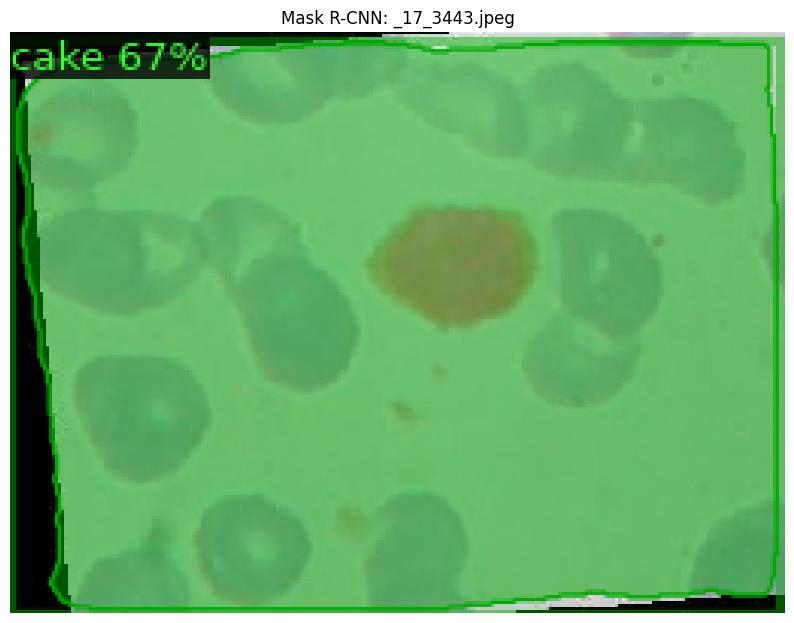


Processing image 2/10: _8_7930.jpeg


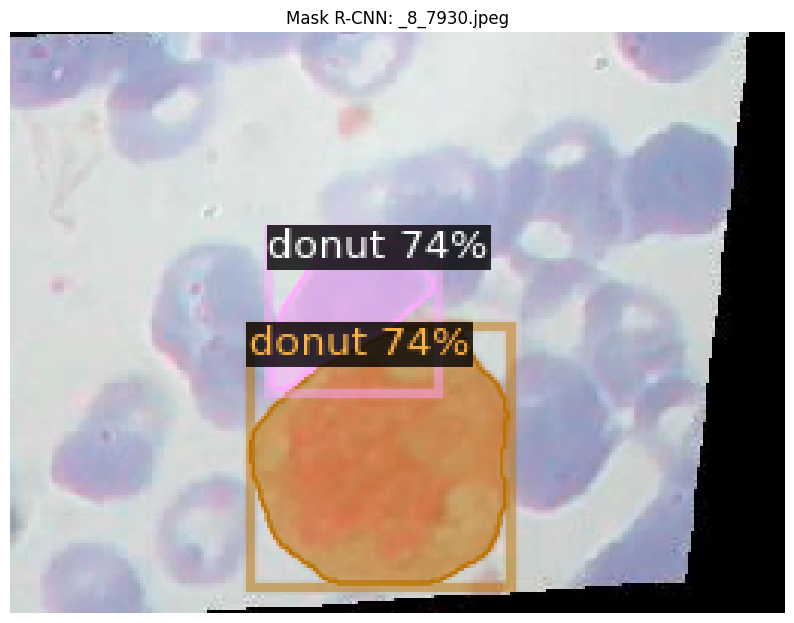


Processing image 3/10: _85_8119.jpeg


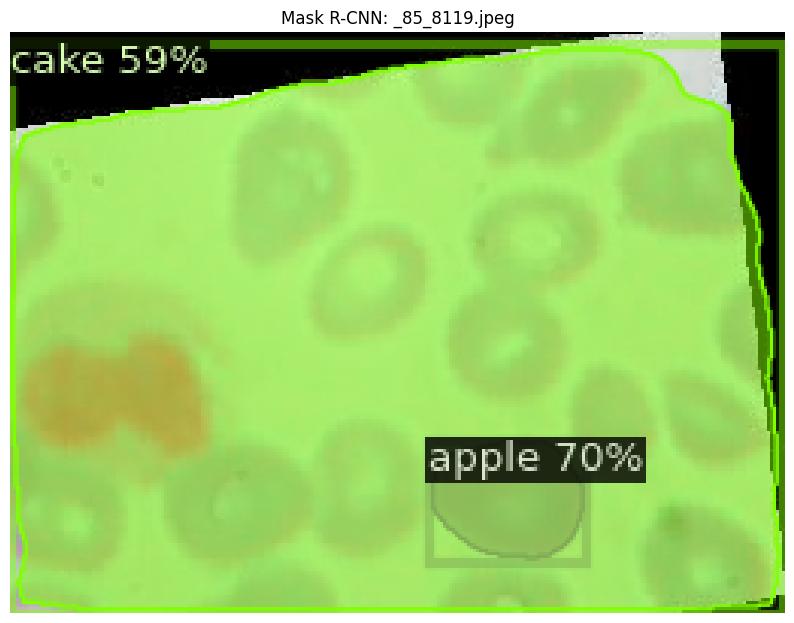


Processing image 4/10: _97_266.jpeg


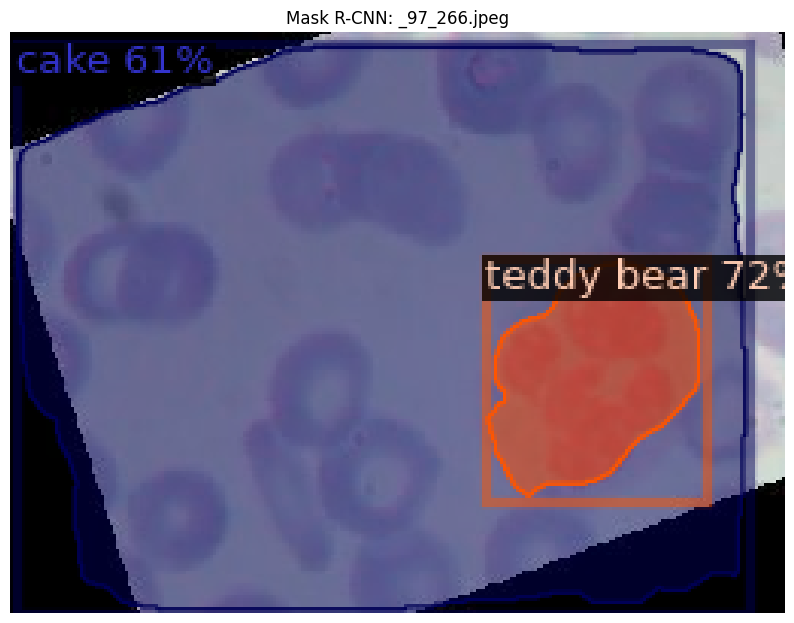


Processing image 5/10: _21_7119.jpeg


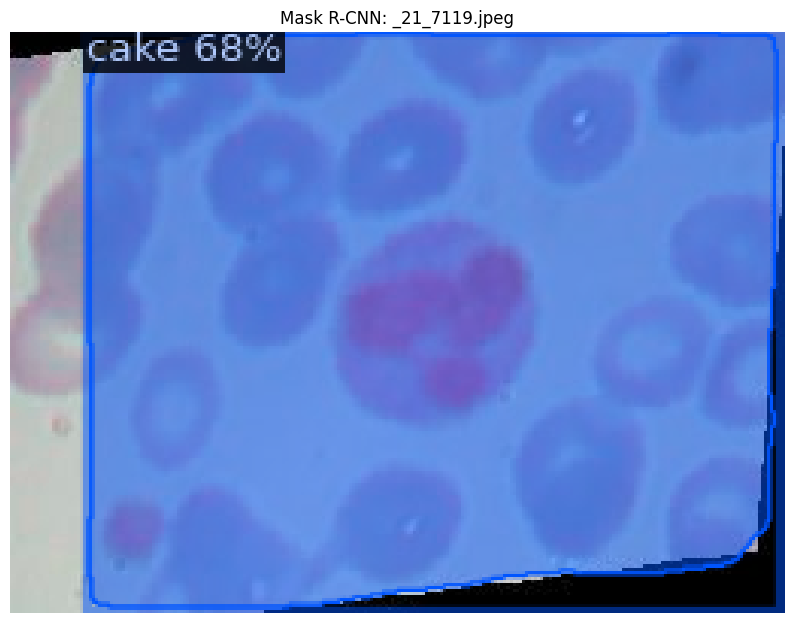


Processing image 6/10: _38_9444.jpeg


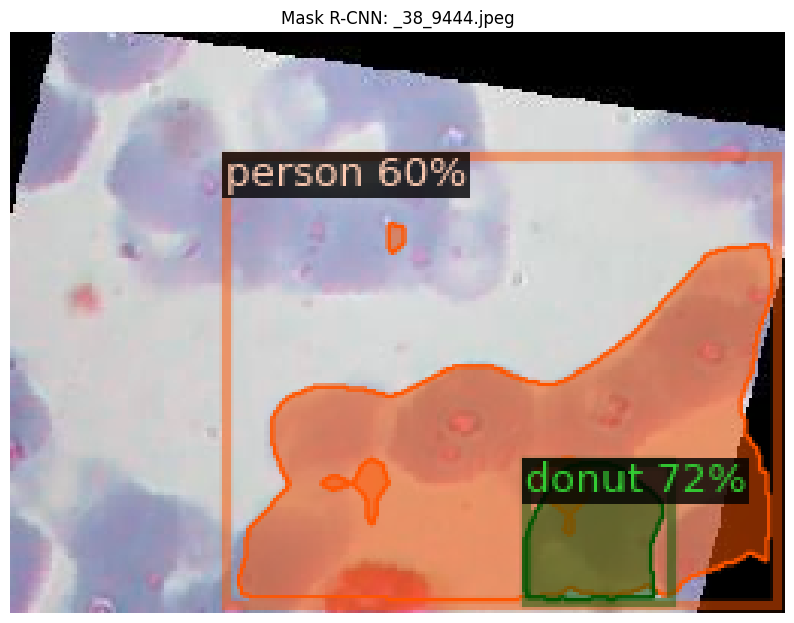


Processing image 7/10: _3_1012.jpeg


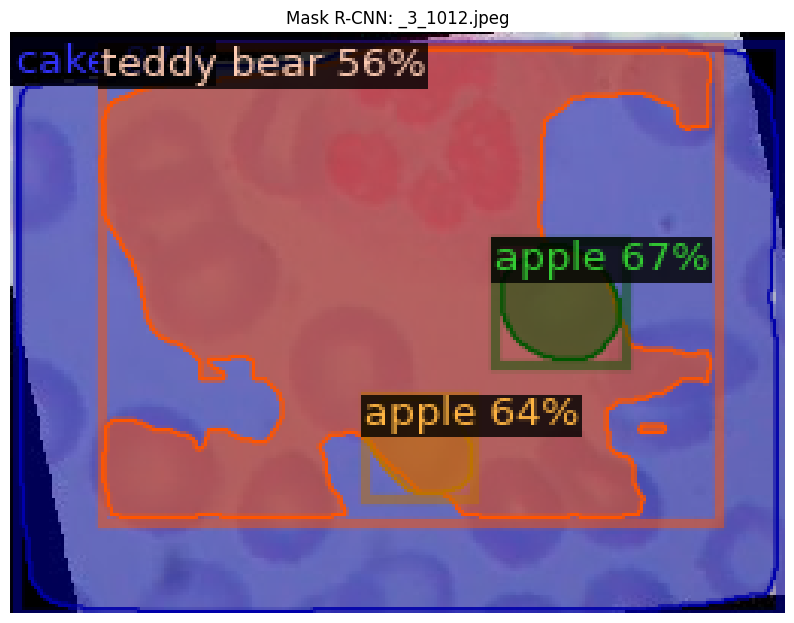


Processing image 8/10: _24_9162.jpeg


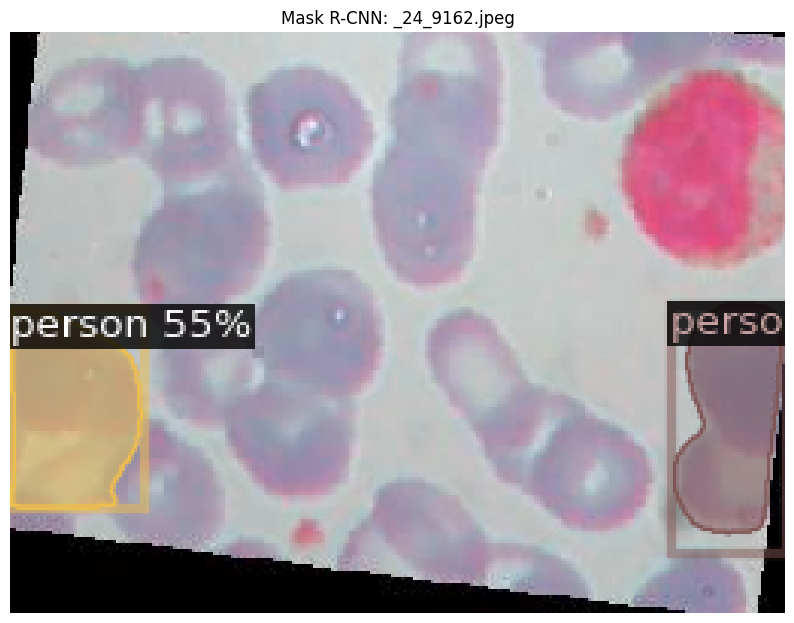


Processing image 9/10: _87_8510.jpeg


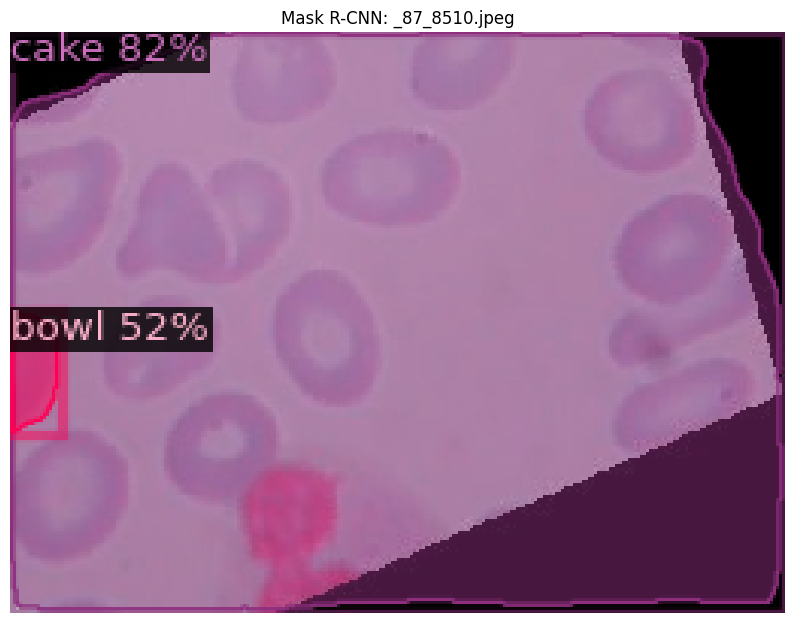


Processing image 10/10: _10_6788.jpeg


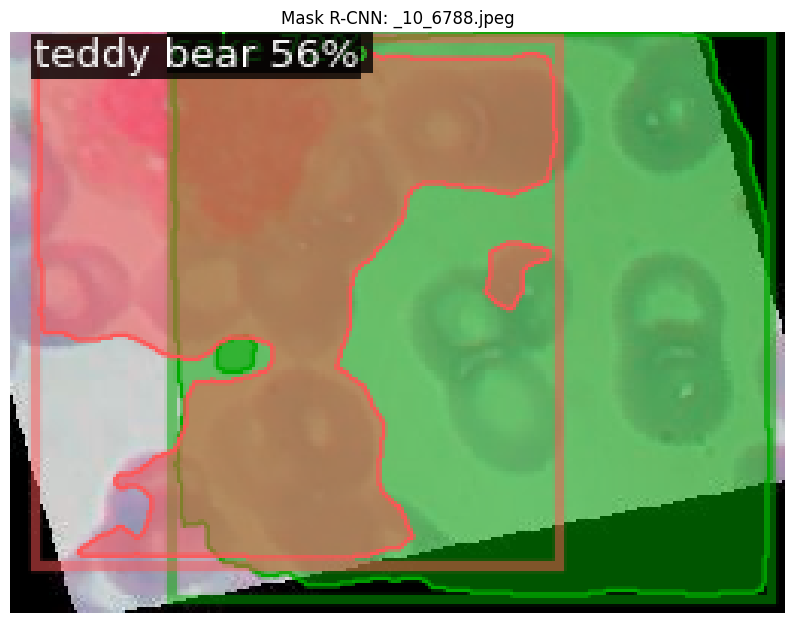

In [ ]:
# STEP 0 (after restart): Ensure uv is available in PATH again if needed
import os
if "/.cargo/bin" not in os.environ["PATH"]:
    os.environ["PATH"] = f"{os.environ['PATH']}:{os.path.expanduser('~/.cargo/bin')}"

# STEP 2: Install Detectron2 (building from source using uv) and run the application
# This cell MUST be run AFTER manually restarting the runtime from Step 1

import sys
import torch
import numpy as np

print(f"Verifying PyTorch version after restart: {torch.__version__}")
print(f"Verifying NumPy version after restart: {np.__version__}")

if not torch.__version__.startswith("2.1.0+cu118"):
    print("ERROR: PyTorch version is not 2.1.0+cu118. Restart runtime after Cell 1.")
elif not np.__version__.startswith("1.26.4"):
    print(f"ERROR: NumPy version is {np.__version__}, expected 1.26.4. Restart runtime after Cell 1.")
else:
    print("PyTorch and NumPy versions are correct. Proceeding with Detectron2 installation.")

    # Install Detectron2 by building from source using uv, WITH NO BUILD ISOLATION
    print("Installing Detectron2 from git using uv (with --no-build-isolation)...")
    # The --no-build-isolation flag is crucial here!
    !uv pip install --system --no-cache --no-build-isolation 'git+https://github.com/facebookresearch/detectron2.git'

    # Install/verify common dependencies
    # (uv might handle these better with no-build-isolation, but explicit install is safe)
    print("Installing/verifying additional dependencies for Detectron2 using uv...")
    !uv pip install --system pyyaml==5.1 cloudpickle iopath omegaconf hydra-core

    print("Detectron2 installation attempt complete.")

# --- Your main application code starts here ---
import glob
import random
import cv2 # OpenCV
import matplotlib.pyplot as plt

# Import Detectron2 components AFTER successful installation
try:
    import detectron2
    from detectron2.utils.logger import setup_logger
    setup_logger()
    from detectron2 import model_zoo
    from detectron2.engine import DefaultPredictor
    from detectron2.config import get_cfg
    from detectron2.utils.visualizer import Visualizer
    from detectron2.data import MetadataCatalog
    print(f"Successfully imported Detectron2 version: {detectron2.__version__}")
except ImportError as e:
    print(f"ERROR: Failed to import Detectron2 components: {e}")
    print("This likely means the Detectron2 installation in the step above failed.")
    print("Check the output from the 'uv pip install git+...' command.")

# Proceed only if import was successful
if 'detectron2' in sys.modules:

    # COCO class names
    COCO_CLASS_NAMES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
     'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
     'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
     'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
     'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
     'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
     'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
     'teddy bear', 'hair drier', 'toothbrush']

    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    if torch.cuda.is_available():
        cfg.MODEL.DEVICE = "cuda"
        print("CUDA is available. Model will run on GPU.")
    else:
        cfg.MODEL.DEVICE = "cpu"
        print("WARNING: CUDA not available, running on CPU. This will be very slow.")
    predictor = DefaultPredictor(cfg)
    print("Detectron2 Mask R-CNN model loaded with COCO weights.")

    # --- Dataset download (Kaggle) ---
    print("Setting up Kaggle API and downloading dataset...")
    KAGGLE_JSON = "/content/kaggle.json"
    if os.path.exists(KAGGLE_JSON):
        os.makedirs("/root/.kaggle", exist_ok=True)
        os.system(f"cp {KAGGLE_JSON} /root/.kaggle/")
        os.system("chmod 600 /root/.kaggle/kaggle.json")
        print("Kaggle API token configured.")
        DATASET_DEST_PATH = '/content/blood_cell_dataset'
        if not os.path.exists(DATASET_DEST_PATH):
            print("Downloading and unzipping blood cell dataset...")
            os.system("kaggle datasets download -d paultimothymooney/blood-cells -p /content/ --force")
            os.system("unzip -q /content/blood-cells.zip -d /content/blood_cell_dataset")
            print("Dataset downloaded and unzipped.")
        else:
            print(f"Dataset already found at {DATASET_DEST_PATH}")
    else:
        print("WARNING: kaggle.json not found in /content/. Please upload it for dataset download.")
        DATASET_DEST_PATH = None

    if DATASET_DEST_PATH:
        IMG_DIR_PRIMARY = os.path.join(DATASET_DEST_PATH, "dataset2-master", "dataset2-master", "images", "TRAIN")
        IMG_DIR_ALT = os.path.join(DATASET_DEST_PATH, "dataset2-master", "images", "TRAIN")
        IMG_DIR_SINGLE = os.path.join(DATASET_DEST_PATH, "images", "TRAIN")

        if os.path.exists(IMG_DIR_PRIMARY): IMG_DIR = IMG_DIR_PRIMARY
        elif os.path.exists(IMG_DIR_ALT): IMG_DIR = IMG_DIR_ALT
        elif os.path.exists(IMG_DIR_SINGLE): IMG_DIR = IMG_DIR_SINGLE
        else:
            print(f"ERROR: Image directory not found. Checked common paths.")
            os.system(f"ls -R {DATASET_DEST_PATH}")
            IMG_DIR = None

        if IMG_DIR:
            print(f"Loading images from: {IMG_DIR}")
            all_img_paths = glob.glob(os.path.join(IMG_DIR, "*/*.jpeg")) + \
                            glob.glob(os.path.join(IMG_DIR, "*/*.jpg")) + \
                            glob.glob(os.path.join(IMG_DIR, "*/*.png"))
            if not all_img_paths:
                 all_img_paths = glob.glob(os.path.join(IMG_DIR, "*.jpeg")) + \
                                 glob.glob(os.path.join(IMG_DIR, "*.jpg")) + \
                                 glob.glob(os.path.join(IMG_DIR, "*.png"))

            if all_img_paths:
                selected_img_paths = random.sample(all_img_paths, min(10, len(all_img_paths)))
                imgs = []
                valid_img_paths = []
                for p in selected_img_paths:
                    try:
                        img = cv2.imread(p)
                        if img is None: continue
                        imgs.append(img)
                        valid_img_paths.append(p)
                    except Exception as e: print(f"Error loading image {p}: {e}")
                print(f"Successfully loaded {len(imgs)} images.")

                if imgs:
                    metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0] if cfg.DATASETS.TRAIN else "coco_2017_val")
                    %matplotlib inline
                    for i, (img_bgr, p) in enumerate(zip(imgs, valid_img_paths)):
                        print(f"\nProcessing image {i+1}/{len(imgs)}: {os.path.basename(p)}")
                        outputs = predictor(img_bgr)
                        v = Visualizer(img_bgr[:, :, ::-1], metadata=metadata, scale=0.8)
                        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
                        plt.figure(figsize=(10,10))
                        plt.imshow(out.get_image()[:, :, ::-1])
                        plt.title(f"Mask R-CNN: {os.path.basename(p)}")
                        plt.axis('off')
                        plt.show()
                else: print("No images were loaded to process.")
            else: print(f"ERROR: No images found in {IMG_DIR}.")
        else: print("Skipping image processing as image directory was not found.")
    else: print("Skipping image processing as dataset was not downloaded.")
else: print("Halting execution due to Detectron2 import failure.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (60000, 28, 28, 1)
y_train_labels shape: (60000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Generator Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator (Sequential)          │ (None, 28, 28, 1)      │     1,493,520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,520 (5.70 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 3,584 (14.00 KB)


Discriminator (for GAN) Summary:


Model: "Discriminator_GAN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator_Base (Sequential) │ (None, 256)            │       533,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gan_output (Dense)              │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 533,505 (2.04 MB)


Combined GAN Model Summary:


Model: "Full_GAN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_16 (Functional)      │ (None, 28, 28, 1)      │     1,493,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator_GAN (Functional)  │ (None, 1)              │       533,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,027,025 (7.73 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 537,089 (2.05 MB)


Starting GAN training...


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


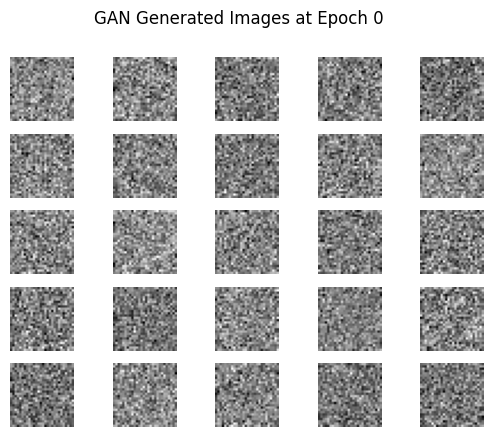

100 [D loss: 1.6784, acc.: 35.78%] [G loss: 0.1341]
200 [D loss: 2.1665, acc.: 35.24%] [G loss: 0.0731]
300 [D loss: 2.4626, acc.: 35.17%] [G loss: 0.0505]
400 [D loss: 2.6724, acc.: 35.11%] [G loss: 0.0386]
500 [D loss: 2.8338, acc.: 35.12%] [G loss: 0.0313]
600 [D loss: 2.9653, acc.: 35.10%] [G loss: 0.0264]
700 [D loss: 3.0759, acc.: 35.09%] [G loss: 0.0228]
800 [D loss: 3.1711, acc.: 35.09%] [G loss: 0.0201]
900 [D loss: 3.2551, acc.: 35.07%] [G loss: 0.0179]
1000 [D loss: 3.3304, acc.: 35.05%] [G loss: 0.0162]


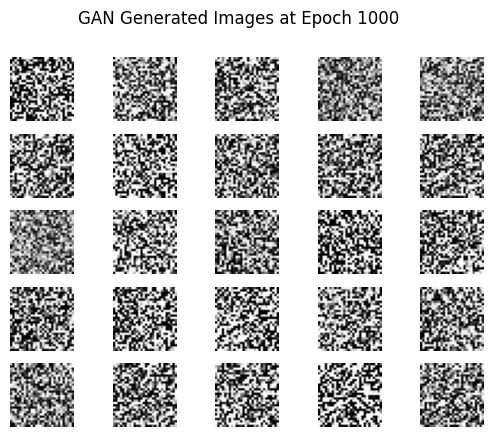

1100 [D loss: 3.3982, acc.: 35.06%] [G loss: 0.0148]
1200 [D loss: 3.4605, acc.: 35.02%] [G loss: 0.0136]
1300 [D loss: 3.5182, acc.: 35.01%] [G loss: 0.0126]
1400 [D loss: 3.5713, acc.: 35.01%] [G loss: 0.0117]
1500 [D loss: 3.6206, acc.: 35.02%] [G loss: 0.0110]
1600 [D loss: 3.6668, acc.: 35.01%] [G loss: 0.0103]
1700 [D loss: 3.7106, acc.: 35.01%] [G loss: 0.0097]
1800 [D loss: 3.7518, acc.: 34.99%] [G loss: 0.0092]
1900 [D loss: 3.7907, acc.: 35.00%] [G loss: 0.0087]
2000 [D loss: 3.8280, acc.: 35.00%] [G loss: 0.0083]


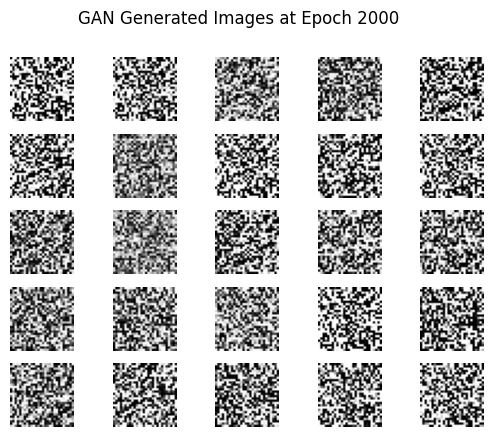

2100 [D loss: 3.8632, acc.: 35.01%] [G loss: 0.0079]
2200 [D loss: 3.8971, acc.: 35.01%] [G loss: 0.0076]
2300 [D loss: 3.9295, acc.: 35.01%] [G loss: 0.0072]
2400 [D loss: 3.9609, acc.: 35.01%] [G loss: 0.0069]
2500 [D loss: 3.9910, acc.: 35.01%] [G loss: 0.0067]
2600 [D loss: 4.0200, acc.: 35.02%] [G loss: 0.0064]
2700 [D loss: 4.0482, acc.: 35.02%] [G loss: 0.0062]
2800 [D loss: 4.0750, acc.: 35.01%] [G loss: 0.0060]
2900 [D loss: 4.1011, acc.: 34.99%] [G loss: 0.0058]
3000 [D loss: 4.1266, acc.: 34.98%] [G loss: 0.0056]


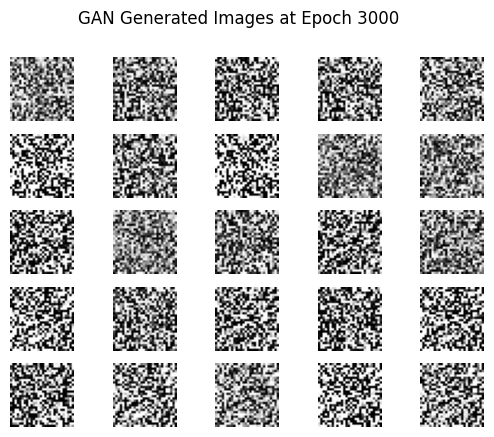

3100 [D loss: 4.1512, acc.: 34.97%] [G loss: 0.0054]
3200 [D loss: 4.1751, acc.: 34.97%] [G loss: 0.0052]
3300 [D loss: 4.1984, acc.: 34.97%] [G loss: 0.0051]
3400 [D loss: 4.2213, acc.: 34.97%] [G loss: 0.0049]
3500 [D loss: 4.2435, acc.: 34.96%] [G loss: 0.0048]
3600 [D loss: 4.2649, acc.: 34.96%] [G loss: 0.0047]
3700 [D loss: 4.2858, acc.: 34.96%] [G loss: 0.0045]
3800 [D loss: 4.3061, acc.: 34.96%] [G loss: 0.0044]
3900 [D loss: 4.3263, acc.: 34.96%] [G loss: 0.0043]
4000 [D loss: 4.3459, acc.: 34.96%] [G loss: 0.0042]


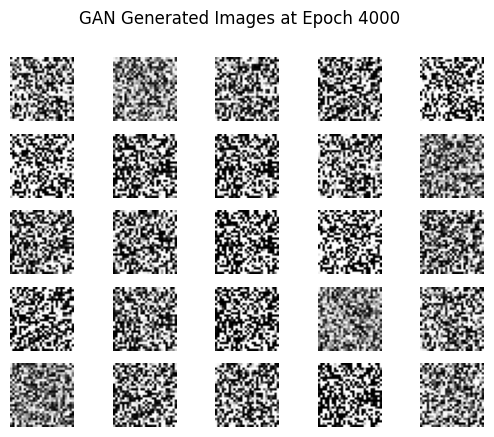

4100 [D loss: 4.3649, acc.: 34.96%] [G loss: 0.0041]
4200 [D loss: 4.3838, acc.: 34.96%] [G loss: 0.0040]
4300 [D loss: 4.4023, acc.: 34.96%] [G loss: 0.0039]
4400 [D loss: 4.4204, acc.: 34.96%] [G loss: 0.0038]
4500 [D loss: 4.4382, acc.: 34.96%] [G loss: 0.0037]
4600 [D loss: 4.4555, acc.: 34.95%] [G loss: 0.0037]
4700 [D loss: 4.4726, acc.: 34.96%] [G loss: 0.0036]
4800 [D loss: 4.4893, acc.: 34.95%] [G loss: 0.0035]
4900 [D loss: 4.5059, acc.: 34.95%] [G loss: 0.0034]
5000 [D loss: 4.5221, acc.: 34.96%] [G loss: 0.0034]


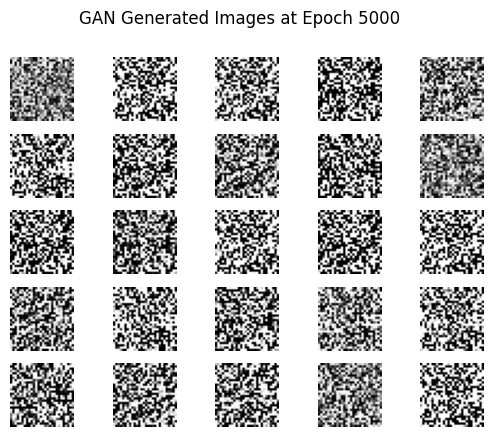

GAN training finished.

Adapting Discriminator for Classification...
Discriminator base layers are trainable for classifier fine-tuning.

Classifier Model (Adapted Discriminator) Summary:


Model: "Discriminator_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator_Base (Sequential) │ (None, 256)            │       533,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_output (Dense)       │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)


Training the Classifier (Adapted Discriminator)...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8415 - loss: 0.5117 - val_accuracy: 0.9452 - val_loss: 0.1816
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9543 - loss: 0.1490 - val_accuracy: 0.9568 - val_loss: 0.1412
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9694 - loss: 0.1003 - val_accuracy: 0.9686 - val_loss: 0.0985
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9737 - loss: 0.0850 - val_accuracy: 0.9705 - val_loss: 0.0908
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9773 - loss: 0.0720 - val_accuracy: 0.9740 - val_loss: 0.0927
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9780 - loss: 0.0694 - val_accuracy: 0.9748 - val_loss: 0.0974
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0607 - val_accuracy: 0.9718 - val_loss: 0.1004
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step 

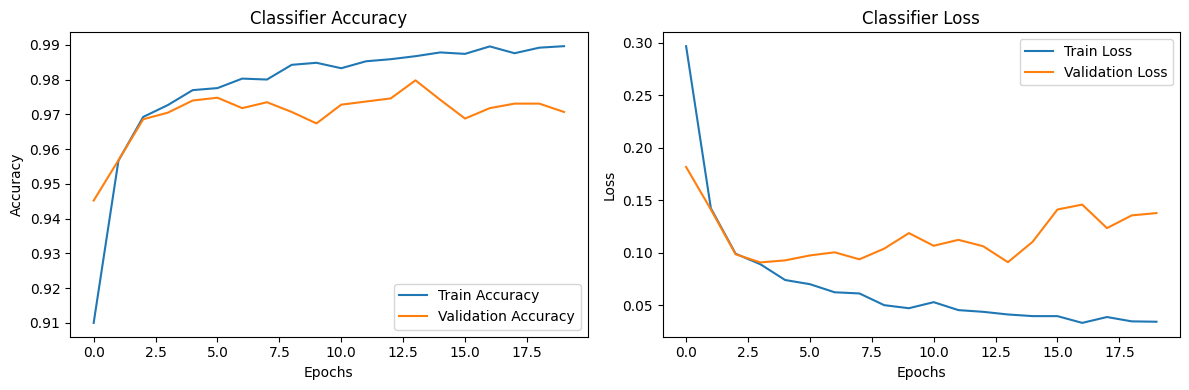


Objective 2: GAN model for image classification task - COMPLETE (using Discriminator as base).


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Suppress TensorFlow INFO and WARNING messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# --- 1. GAN Configuration and Hyperparameters ---
IMG_ROWS = 28
IMG_COLS = 28
CHANNELS = 1
IMG_SHAPE = (IMG_ROWS, IMG_COLS, CHANNELS)
LATENT_DIM = 100 # Size of the noise vector for the generator
BATCH_SIZE = 128
EPOCHS_GAN = 10000 # Epochs for GAN training
EPOCHS_CLASSIFIER = 20 # Epochs for classifier training
SAMPLE_INTERVAL = 1000 # Interval to save generated images and model (for GAN)

# Adam optimizer parameters (common for GANs)
adam_lr = 0.0002
adam_beta_1 = 0.5

# --- 2. Load and Preprocess MNIST Dataset ---
(X_train, y_train_labels), (X_test, y_test_labels) = mnist.load_data()

# Rescale -1 to 1 (common for GANs with tanh activation in generator)
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

X_test = (X_test.astype(np.float32) - 127.5) / 127.5
X_test = np.expand_dims(X_test, axis=3)

# For classifier training later
y_train_cat = to_categorical(y_train_labels, num_classes=10)
y_test_cat = to_categorical(y_test_labels, num_classes=10)

print(f"X_train shape: {X_train.shape}")
print(f"y_train_labels shape: {y_train_labels.shape}")

# --- 3. Build Generator ---
def build_generator():
    model = Sequential(name="Generator")
    model.add(Dense(256, input_dim=LATENT_DIM))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(IMG_SHAPE), activation='tanh')) # tanh for -1 to 1 output
    model.add(Reshape(IMG_SHAPE))
    # model.summary() # Uncomment to see summary

    noise = Input(shape=(LATENT_DIM,))
    img = model(noise)
    return Model(noise, img)

# --- 4. Build Discriminator ---
def build_discriminator():
    model = Sequential(name="Discriminator_Base") # Will be used as base for classifier
    model.add(Flatten(input_shape=IMG_SHAPE))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    # Output layer for GAN: real or fake (sigmoid for probability)
    # This layer will be replaced/bypassed for the classifier
    # model.add(Dense(1, activation='sigmoid')) # GAN output
    # model.summary() # Uncomment to see summary

    img = Input(shape=IMG_SHAPE)
    # validity = model(img) # For GAN
    # return Model(img, validity) # For GAN
    return model # Return the base model without the final sigmoid layer

# --- 5. Compile GAN Components ---
# Build and compile the discriminator for GAN training
discriminator_gan_output_layer = Dense(1, activation='sigmoid', name="gan_output")
img_input_for_gan_discriminator = Input(shape=IMG_SHAPE)
discriminator_base_model = build_discriminator()
gan_validity = discriminator_gan_output_layer(discriminator_base_model(img_input_for_gan_discriminator))
discriminator_gan = Model(img_input_for_gan_discriminator, gan_validity, name="Discriminator_GAN")

discriminator_gan.compile(loss='binary_crossentropy',
                        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                        metrics=['accuracy'])

# Build the generator
generator = build_generator()

# For the combined GAN model, we only train the generator
# The discriminator's weights are frozen in this combined model
discriminator_gan.trainable = False

# Input noise for generator
z = Input(shape=(LATENT_DIM,))
img_generated = generator(z)

# Discriminator takes generated image as input and determines validity
validity_from_gan = discriminator_gan(img_generated)

# Combined GAN model (stacks generator and discriminator)
# Trains generator to fool discriminator
combined_gan_model = Model(z, validity_from_gan, name="Full_GAN")
combined_gan_model.compile(loss='binary_crossentropy',
                           optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1))

print("\nGenerator Summary:")
generator.summary()
print("\nDiscriminator (for GAN) Summary:")
discriminator_gan.summary()
print("\nCombined GAN Model Summary:")
combined_gan_model.summary()


# --- 6. Train the GAN ---
def train_gan(epochs, batch_size, sample_interval):
    print("\nStarting GAN training...")
    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # --- Train Discriminator ---
        # Select a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]

        # Generate a batch of new fake images
        noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
        gen_imgs = generator.predict(noise, verbose=0)

        # Train the discriminator (real images labelled as 1, fake as 0)
        d_loss_real = discriminator_gan.train_on_batch(real_imgs, valid)
        d_loss_fake = discriminator_gan.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # --- Train Generator ---
        # Generate a new batch of noise
        noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))

        # Train the generator (to have the discriminator label fakes as 1)
        g_loss = combined_gan_model.train_on_batch(noise, valid)

        # Print progress
        if epoch % (sample_interval // 10) == 0 and epoch > 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

        # If at sample interval, save generated image samples
        if epoch % sample_interval == 0:
            sample_images(epoch)
            # Optionally save models
            # generator.save(f"generator_epoch_{epoch}.h5")
            # discriminator_gan.save(f"discriminator_gan_epoch_{epoch}.h5")
    print("GAN training finished.")

def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, LATENT_DIM))
    gen_imgs = generator.predict(noise, verbose=0)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    # fig.savefig(f"gan_generated_image_epoch_{epoch}.png") # Uncomment to save
    plt.suptitle(f"GAN Generated Images at Epoch {epoch}")
    plt.show()
    plt.close()

# Train the GAN (can take a while, reduce epochs for a quick test)
# For a proper result, EPOCHS_GAN should be higher (e.g., 10000-50000 or more)
# For this example, let's run fewer epochs to make it faster.
# If you have time, increase EPOCHS_GAN.
current_epochs_gan = 5001 # Reduced for quicker demo
if current_epochs_gan > 0:
    train_gan(epochs=current_epochs_gan, batch_size=BATCH_SIZE, sample_interval=SAMPLE_INTERVAL)
else:
    print("Skipping GAN training as current_epochs_gan is 0.")
    # If skipping GAN training, you'd ideally load a pre-trained discriminator base here
    # For this example, we'll use the randomly initialized one if GAN training is skipped.

# --- 7. Adapt Discriminator for Classification ---
print("\nAdapting Discriminator for Classification...")

# Get the base of the discriminator (without the GAN's final sigmoid layer)
# If GAN training was skipped, discriminator_base_model is already initialized.
# If GAN was trained, discriminator_base_model contains the trained weights up to the features.
# Make sure discriminator_base_model is what we intend.
# The 'discriminator_base_model' from build_discriminator() is what we need.
# Its weights would have been updated during GAN training because it's part of 'discriminator_gan'.

# Option 1: Freeze the base layers (transfer learning, train only the new head)
# for layer in discriminator_base_model.layers:
#     layer.trainable = False
# print("Discriminator base layers frozen for classifier training.")

# Option 2: Allow some or all base layers to be fine-tuned (set trainable = True or selectively)
# For this example, let's make them trainable for fine-tuning.
for layer in discriminator_base_model.layers:
    layer.trainable = True
print("Discriminator base layers are trainable for classifier fine-tuning.")


# Add a new classification head
classification_output = Dense(10, activation='softmax', name="classifier_output")(discriminator_base_model.output)

# Create the new classifier model
classifier_model = Model(inputs=discriminator_base_model.input, outputs=classification_output, name="Discriminator_Classifier")

classifier_model.compile(loss='categorical_crossentropy',
                         optimizer=Adam(learning_rate=0.001), # Standard Adam for classification
                         metrics=['accuracy'])

print("\nClassifier Model (Adapted Discriminator) Summary:")
classifier_model.summary()

# --- 8. Train the Classifier ---
print("\nTraining the Classifier (Adapted Discriminator)...")

# We use the original MNIST images (X_train, X_test) but scaled 0-1 for classifier
# The GAN used -1 to 1. For a standard classifier with softmax, 0-1 is common.
# Let's rescale X_train and X_test for the classifier (or ensure layers handle -1 to 1)
# The discriminator base was trained on -1 to 1 data. So, we should feed it -1 to 1 data.
# No need to rescale X_train/X_test again, they are already -1 to 1.

history_classifier = classifier_model.fit(X_train, y_train_cat,
                                          epochs=EPOCHS_CLASSIFIER,
                                          batch_size=BATCH_SIZE,
                                          validation_data=(X_test, y_test_cat),
                                          verbose=1)

print("Classifier training finished.")

# --- 9. Evaluate the Classifier ---
loss, accuracy = classifier_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nClassifier Test Accuracy: {accuracy*100:.2f}%")
print(f"Classifier Test Loss: {loss:.4f}")

# Plot training history for the classifier
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_classifier.history['accuracy'], label='Train Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classifier Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_classifier.history['loss'], label='Train Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.title('Classifier Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

print("\nObjective 2: GAN model for image classification task - COMPLETE (using Discriminator as base).")

